In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("mobile_recommendation_system_dataset.csv/mobile_recommendation_system_dataset.csv")

In [4]:
df.head()

,name,ratings,price,imgURL,corpus
0,"REDMI Note 12 Pro 5G (Onyx Black, 128 GB)",4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,Storage128 GBRAM6 SystemAndroid 12Processor T...
1,"OPPO F11 Pro (Aurora Green, 128 GB)",4.5,"₹20,999",https://rukminim2.flixcart.com/image/312/312/k...,Storage128 GBRAM6 GBExpandable Storage256GB S...
2,"REDMI Note 11 (Starburst White, 64 GB)",4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,Storage64 GBRAM4 SystemAndroid 11Processor Sp...
3,"OnePlus Nord CE 5G (Blue Void, 256 GB)",4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,Storage256 GBRAM12 SystemAndroid Q 11Processo...
4,"APPLE iPhone 13 mini (Blue, 128 GB)",4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,Storage128 SystemiOS 15Processor TypeA15 Bion...


In [27]:
df.columns

Index(['name', 'ratings', 'price', 'imgURL', 'corpus'], dtype='object')

In [21]:
df.isna().sum()

name        0
ratings     0
price       0
imgURL      0
corpus     12
dtype: int64

In [22]:
df.dropna(inplace = True)

In [24]:
df.isna().sum()

name       0
ratings    0
price      0
imgURL     0
corpus     0
dtype: int64

In [25]:
df.shape

(2534, 5)

In [26]:
df['name'].nunique()

2128

In [16]:
df["corpus"].iloc[0]

'Storage128 GBRAM6  SystemAndroid 12Processor TypeMediatek Dimensity 1080Processor Speed2.6 50MP 8MP 2MP 50MP 16MP 5G Capacity5000 Display Size16.94 cm (6.67 inch)Resolution2400 x 1080 PixelsResolution TypeFull HD+ AMOLED DisplayGPUARM Mali-G68 MC4Display TypeFull HD+ AMOLED DisplayOther Display FeaturesRefresh Rate: 120 Hz, Contrast: 5,000,000:1, 1920Hz PWM Dimming, Brightness Level: 16000:1, Peak Brightness: 900 nits'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2546 entries, 0 to 2545
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   name     2546 non-null   object 
 1   ratings  2546 non-null   float64
 2   price    2546 non-null   object 
 3   imgURL   2546 non-null   object 
 4   corpus   2534 non-null   object 
dtypes: float64(1), object(4)
memory usage: 99.6+ KB


In [6]:
df["price"] = df["price"].str.replace('₹', '').str.replace(',','').astype(int)

In [7]:
df['price']

0       23999
1       20999
2       13149
3       21999
4        3537
        ...  
2541    11999
2542    30203
2543     1549
2544    20463
2545    13999
Name: price, Length: 2546, dtype: int32

<Axes: xlabel='ratings', ylabel='count'>

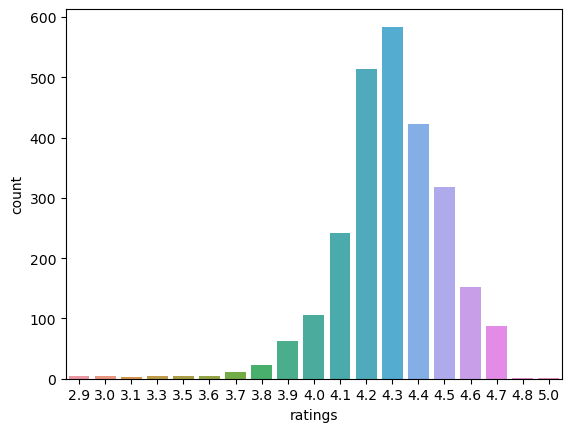

In [8]:
import matplotlib.pyplot as plt
import seaborn as sn
sn.set_palette("bright")
data = df['ratings']
sn.countplot(x='ratings',data=df)

In [17]:
import spacy
nlp = spacy.load("en_core_web_lg")

In [67]:
import re
def process(text):
    filtered = []
    ptext = re.sub(r"[^\w]", " ", text)
    ptext = re.sub(r"\s+", " ", ptext)
    doc = nlp(ptext)
    for token in doc:
        if token.is_punct or token.is_stop:
            continue
        filtered.append(token.text.lower())  
    return " ".join(filtered)    

In [45]:
text = 'Storage128 GBRAM6  SystemAndroid 12Processor TypeMediatek Dimensity 1080Processor Speed2.6 50MP 8MP 2MP 50MP 16MP 5G Capacity5000 Display Size16.94 cm (6.67 inch)Resolution2400 x 1080 PixelsResolution TypeFull HD+ AMOLED DisplayGPUARM Mali-G68 MC4Display TypeFull HD+ AMOLED DisplayOther Display FeaturesRefresh Rate: 120 Hz, Contrast: 5,000,000:1, 1920Hz PWM Dimming, Brightness Level: 16000:1, Peak Brightness: 900 nits'

In [42]:
ptext = re.sub(r"[^\w\s]", " ", text)
ptext = re.sub(r"\s+", " ", ptext)

In [43]:
ptext

'Storage128 GBRAM6 SystemAndroid 12Processor TypeMediatek Dimensity 1080Processor Speed2 6 50MP 8MP 2MP 50MP 16MP 5G Capacity5000 Display Size16 94 cm 6 67 inch Resolution2400 x 1080 PixelsResolution TypeFull HD AMOLED DisplayGPUARM Mali G68 MC4Display TypeFull HD AMOLED DisplayOther Display FeaturesRefresh Rate 120 Hz Contrast 5 000 000 1 1920Hz PWM Dimming Brightness Level 16000 1 Peak Brightness 900 nits'

In [46]:
process(text)

'Storage128 GBRAM6 SystemAndroid 12Processor TypeMediatek Dimensity 1080Processor Speed2 6 50MP 8MP 2MP 50MP 16MP 5 G Capacity5000 Display Size16 94 cm 6 67 inch Resolution2400 x 1080 PixelsResolution TypeFull HD AMOLED DisplayGPUARM Mali G68 MC4Display TypeFull HD AMOLED DisplayOther Display FeaturesRefresh Rate 120 Hz Contrast 5 000 000 1 1920Hz PWM Dimming Brightness Level 16000 1 Peak Brightness 900 nits'

In [68]:
process('REDMI Note 12 Pro 5G (Onyx Black, 128 GB)')

'redmi note 12 pro 5 g onyx black 128 gb'

In [69]:
df["corpus"] = df["corpus"].apply(process)

In [70]:
df["name"] = df["name"].apply(process)

In [96]:
df.head()

,name,ratings,price,imgURL,corpus
0,redmi note 12 pro 5 g onyx black 128 gb,4.2,23999,https://rukminim2.flixcart.com/image/312/312/x...,storage128 gbram6 systemandroid 12processor ty...
1,oppo f11 pro aurora green 128 gb,4.5,20999,https://rukminim2.flixcart.com/image/312/312/k...,storage128 gbram6 gbexpandable storage256 gb s...
2,redmi note 11 starburst white 64 gb,4.2,13149,https://rukminim2.flixcart.com/image/312/312/x...,storage64 gbram4 systemandroid 11processor spe...
3,oneplus nord ce 5 g blue void 256 gb,4.1,21999,https://rukminim2.flixcart.com/image/312/312/x...,storage256 gbram12 systemandroid q 11processor...
4,apple iphone 13 mini blue 128 gb,4.6,3537,https://rukminim2.flixcart.com/image/312/312/k...,storage128 systemios 15processor typea15 bioni...


In [97]:
df.drop_duplicates(subset = ["name"],inplace = True,keep='first')

In [98]:
df.shape

(2096, 5)

In [99]:
df.reset_index(drop=True,inplace=True)

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [101]:
tfid_matrix = vectorizer.fit_transform(df["corpus"])

In [102]:
tfid_matrix

<2096x1794 sparse matrix of type '<class 'numpy.float64'>'
	with 84715 stored elements in Compressed Sparse Row format>

In [103]:
from sklearn.metrics.pairwise import cosine_similarity

In [104]:
cos_sim = cosine_similarity(tfid_matrix,tfid_matrix)

In [105]:
cos_sim

array([[1.        , 0.10282128, 0.14463731, ..., 0.22018589, 0.09467916,
        0.10333634],
       [0.10282128, 1.        , 0.03374633, ..., 0.09761864, 0.06345556,
        0.17802726],
       [0.14463731, 0.03374633, 1.        , ..., 0.06711673, 0.19952552,
        0.07581006],
       ...,
       [0.22018589, 0.09761864, 0.06711673, ..., 1.        , 0.0665365 ,
        0.13644178],
       [0.09467916, 0.06345556, 0.19952552, ..., 0.0665365 , 1.        ,
        0.07389368],
       [0.10333634, 0.17802726, 0.07581006, ..., 0.13644178, 0.07389368,
        1.        ]])

In [110]:
def recommend(name,n_recommend = 5):
    index = df[df['name'] == name].index[0]
    sim_score = list(enumerate(cos_sim[index]))
    sim_score = sorted(sim_score, key=lambda x: x[1], reverse=True)
    top_recommend = [df.iloc[score[0]] for score in sim_score[1:n_recommend + 1]]
    return top_recommend

In [112]:
recommend("apple iphone 13 mini blue 128 gb")

[name                 apple iphone 13 mini product red 128 gb
 ratings                                                  4.7
 price                                                   3537
 imgURL     https://rukminim2.flixcart.com/image/312/312/k...
 corpus     storage128 systemios 15processor typea15 bioni...
 Name: 408, dtype: object,
 name                   apple iphone 13 mini starlight 128 gb
 ratings                                                  4.5
 price                                                   3537
 imgURL     https://rukminim2.flixcart.com/image/312/312/k...
 corpus     storage128 systemios 15processor typea15 bioni...
 Name: 673, dtype: object,
 name                       apple iphone 13 mini green 128 gb
 ratings                                                  4.7
 price                                                   3537
 imgURL     https://rukminim2.flixcart.com/image/312/312/l...
 corpus     storage128 systemios 15processor typea15 bioni...
 Name: 1238, dty